In [56]:
#CIFAR10 Dataset

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train = torchvision.datasets.CIFAR10(root='data/', train=True,
                                        download=True, transform=transform)

test = torchvision.datasets.CIFAR10(root='data/', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [57]:
#Tensorboard

from tensorboardX import SummaryWriter

writer = SummaryWriter()

torch.Size([10000, 3, 32, 32])
torch.Size([10000])


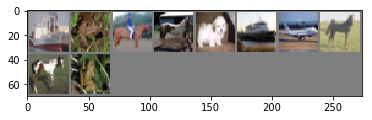

ship frog horse horse dog ship plane horse horse frog


In [58]:
#Data Loader

batch_size = 10000

import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as utils

data_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                          shuffle=True, num_workers=1)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

batch_images, batch_labels = next(iter(data_loader))

print(batch_images.size())
print(batch_labels.size())

imshow(utils.make_grid(batch_images[:10]))
print(' '.join('%s' % classes[batch_labels[j]] for j in range(10)))

In [59]:
#Define Neural Network

linear1 = torch.nn.Linear(3*32*32,6*32,bias=True)
linear2 = torch.nn.Linear(6*32,10,bias=True)
relu = torch.nn.ReLU()
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,relu,linear2)
    
print(model)

Sequential(
  (0): Linear(in_features=3072, out_features=192, bias=True)
  (1): ReLU()
  (2): Linear(in_features=192, out_features=10, bias=True)
)


In [60]:
#Define Loss Function and Optimizer

import torch.optim as optim

learning_rate = 0.001
momentum = 0.9

loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [61]:
#Train Model

from torch.autograd import Variable
import time

training_epochs = 5

for epoch in range(training_epochs):  
    avg_loss = 0.0
    total_batch = len(train)//batch_size
    start_time = time.time()
    
    for i, (batch_images,batch_labels) in enumerate(data_loader, 0):
        
        optimizer.zero_grad()
        X = Variable(batch_images.view(-1,3*32*32))
        Y = Variable(batch_labels)
        
        Y_pred = model(X)
        loss = loss_func(Y_pred,Y)
        loss.backward()
        optimizer.step()
        writer.add_scalar('Train/Loss', loss, epoch*batch_size+i)
        
        avg_loss += loss.item()/total_batch
    
    print("[Epoch: {}] cost = {}".format(epoch+1, avg_loss))
    print("    training takes {} secs".format(time.time()-start_time))

print('Training Finished!')

[Epoch: 1] cost = 2.0679190158843994
    training takes 15.351911306381226 secs
[Epoch: 2] cost = 1.812007212638855
    training takes 12.585604190826416 secs
[Epoch: 3] cost = 1.7143936157226562
    training takes 12.771283149719238 secs
[Epoch: 4] cost = 1.6450544595718382
    training takes 12.800817728042603 secs
[Epoch: 5] cost = 1.5965820312499999
    training takes 12.34943675994873 secs
Training Finished!


In [62]:
#Saving Model

print("Saving model...")
torch.save(model.state_dict(),'model.pkl')
print("Model is saved!")

writer.close()

Saving model...
Model is saved!


In [63]:
#Measuring performance

correct = 0
total = 0

for images, labels in test:
    images  = Variable(images.view(-1, 3*32*32))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 44 %


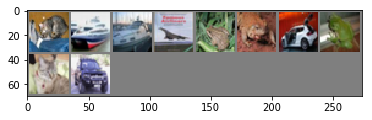

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:      cat truck  ship  ship  deer  frog   cat  frog   cat   car


In [64]:
#Testing Trained Model

batch_images, batch_labels = next(iter(testloader))

imshow(torchvision.utils.make_grid(batch_images[:10]))
print('GroundTruth: ', ' '.join('%5s' % classes[batch_labels[j]] for j in range(10)))

outputs = model(batch_images.view(-1,3*32*32))
_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))